In [ ]:
import math
import numpy as np
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
import sklearn
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

In [ ]:
d = 100
mu = 1
L = 1000
E = np.eye(d)

def positive_determined_matrix(d, mu, L): #генерация положительно-определенной матрицы, так чтобы A-mu*I >= 0
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu, L,d)
        diagonal_entries[0] = mu
        diagonal_entries[1] = L
        D = np.diag(diagonal_entries)
        m = ortho_group.rvs(d)
        A = m.dot(D).dot(np.linalg.inv(m))
        if (np.all(np.linalg.eigvals(A-mu*E) >= 0)):
            i += 1

    return A

A = positive_determined_matrix(d, mu, L)
b = np.random.uniform(0, 2, d)

def gradient(x, A, b):
    return A.dot(x) - b


In [ ]:
def gradient_descent(A, b, start, learning_rate, amount_of_iterations):
    x = start
    criterion = []
    time_prog = []
    begin_time = time.time()
    for i in range (1, amount_of_iterations):
        grad = gradient(x, A, b)
        x = x - learning_rate*grad
        criterion.append(np.linalg.norm(grad)**2)
        time_prog.append(-begin_time + time.time())

    return criterion, time_prog, x


In [ ]:
GD = gradient_descent(A, b, np.zeros(d), 1/L, 10000)

Получим формулу.

$f(x_{k + 1}) → min$

$\gamma_k = argmin_{\gamma \geq 0}f(x_{k + 1}(\gamma))$

Возьмём производную и приравняем её к нулю, получим $\nabla f_{k + 1}^T \nabla f_k = 0$.

Но $\nabla f_{k + 1} = (Ax_{k + 1} - b)$, тогда:

$g = \nabla f(x_k), (Ax_{k + 1} - b)^T g = 0, (x_k -\gamma g)Ag -b^Tg = 0, x_k^TAg -\gamma g^TAg -b^Tg = 0$

$g^Tg - \gamma g^TAg = 0 \Rightarrow$
$\gamma = \frac{g^Tg}{g^TAg}$

In [ ]:
def choose_lr(grad, A):
    return (grad @ grad)/(grad.T @ A @ grad)

def steepest_gradient_descent(A, b, start, amount_of_iterations):
    x = start
    criterion = []
    time_prog = []
    begin_time = time.time()
    for i in range (1, amount_of_iterations):
        grad = gradient(x, A, b)
        lr = choose_lr(grad, A)
        x = x - lr*grad
        criterion.append(np.linalg.norm(grad)**2)
        time_prog.append(-begin_time + time.time())

    return criterion, time_prog, x


In [ ]:
SGD = steepest_gradient_descent(A, b, np.zeros(d), 10000)

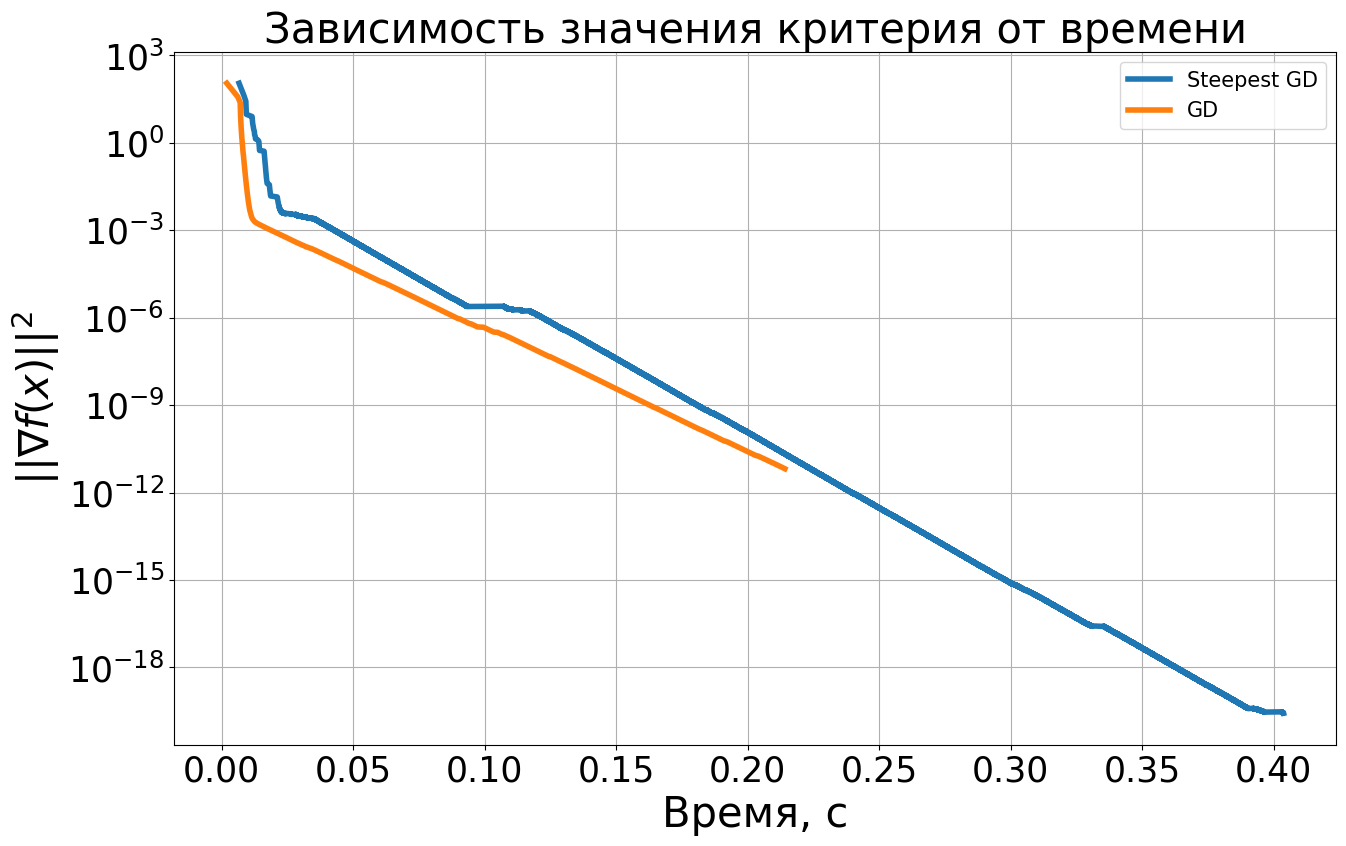

In [ ]:
plt.figure(figsize=(15, 9))

plt.semilogy(SGD[1], SGD[0], linewidth=4, label = 'Steepest GD')
plt.semilogy(GD[1], GD[0], linewidth=4, label = 'GD')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Время, с", fontsize=30)
plt.ylabel(r"$||\nabla f(x)||^2$", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid()

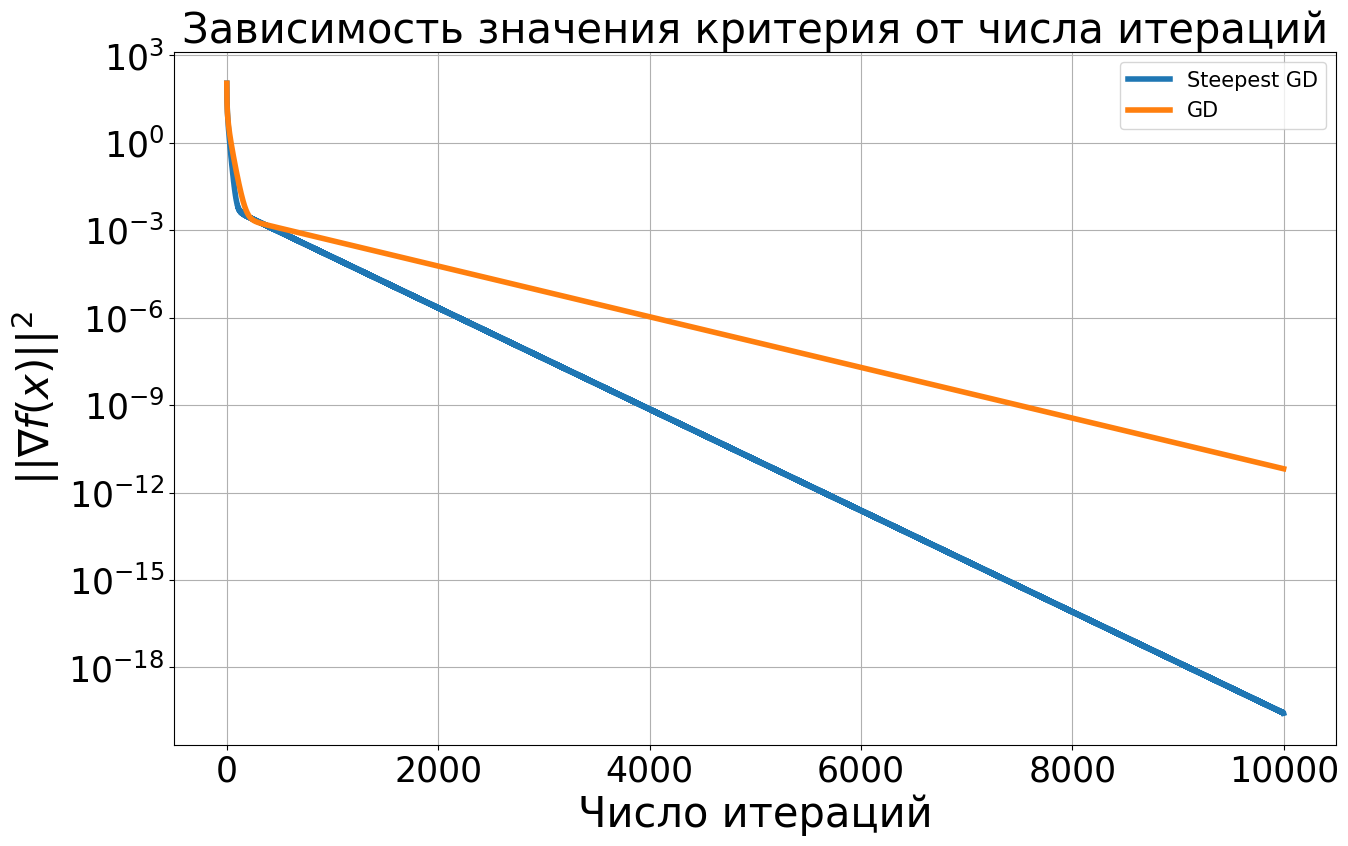

In [ ]:
plt.figure(figsize=(15, 9))

plt.semilogy(np.arange(9999), SGD[0], linewidth=4, label = 'Steepest GD')
plt.semilogy(np.arange(9999), GD[0], linewidth=4, label = 'GD')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Число итераций", fontsize=30)
plt.ylabel(r"$||\nabla f(x)||^2$", fontsize=30)
plt.title(r"Зависимость значения критерия от числа итераций", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid()